In [1]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve, \
                            confusion_matrix

from matplotlib import pyplot as plt  # for the plots 
from utils import load_data           # just to show some examples 


In [2]:
true_labels, predicted_labels, predicted_probabilities = load_data()

# Classification Metrics

## Accuracy score

In [3]:
# advice: always use named arguments when calculating metrics 
accuracy = accuracy_score(y_true=true_labels, y_pred=predicted_labels)
accuracy

0.671353251318102

## Precision

In [4]:
# advice: always use named arguments when calculating metrics
precision = precision_score(y_true=true_labels, y_pred=predicted_labels)
precision

0.9885057471264368

## Recall

In [5]:
# advice: always use named arguments when calculating metrics
recall = recall_score(y_true=true_labels, y_pred=predicted_labels)
recall

0.48179271708683474

## F1-score

In [6]:
# advice: always use named arguments when calculating metrics
f1 = f1_score(y_true=true_labels, y_pred=predicted_labels)
f1

0.647834274952919

## AUC score

AUC score can only be used for binary classification problems

In [7]:
# advice: always use named arguments when calculating metrics
# Also remember to use the probabilities, not the predicted labels, 
#     or it will silently give you wrong results 
roc_auc = roc_auc_score(y_true=true_labels,
                        y_score=predicted_probabilities)
roc_auc

0.948152846044078

# Roc Curve 

In [8]:
# advice: always use named arguments when calculating metrics
# Also remember to use the probabilities, not the predicted labels, 
#     or it will silently give you wrong results 
fpr, tpr, thresholds = roc_curve(y_true=true_labels, y_score=predicted_probabilities)

# Confusion Matrix

In [9]:
# advice: always use named arguments when calculating metrics
# don't call this confusion_matrix, or you can accidentally override the inport! 
confmat = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)

# Pretty Roc Curve 

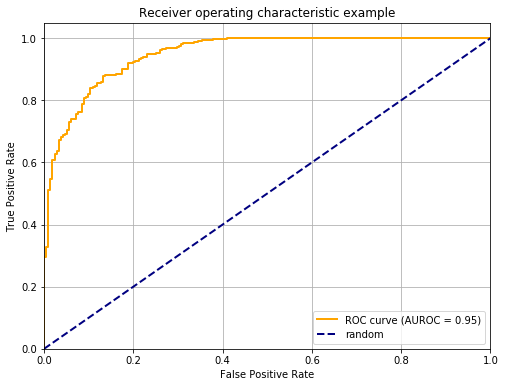

In [10]:
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curve(roc_auc=roc_auc, fpr=fpr, tpr=tpr)

# Pretty Confusion Matrix

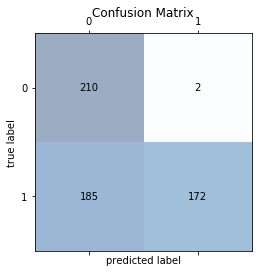

In [11]:
def make_confmat_pretty(confmat):
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title('Confusion Matrix')
    plt.show()
    
make_confmat_pretty(confmat=confmat)